In [47]:
%load_ext autoreload
%autoreload 2
import sys
from os import path
import os


sys.path.insert(0, "../../")
sys.path.insert(0, "./")

from isanet.neural_network import MLPRegressor
from isanet.model import Mlp
from isanet.optimizer import SGD
from isanet.utils.model_utils import printMSE, printAcc, plotMse, save_data, load_data
from isanet.optimizer import EarlyStopping
from isanet.model_selection import Kfold, GridSearchCV
from isanet.metrics import mse, mee, accuracy_binary

import numpy as np
import time
import datetime
import pickle
import matplotlib.pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
def plotCup(history):
    plt.plot(history["loss_mse"])
    plt.plot(history["val_loss_mse"], linestyle='--')
    plt.title('MSE')
    plt.ylabel('MSE')
    plt.xlabel('epoch')
    plt.grid()
    plt.legend(['Training', 'Validation'], loc='upper right', fontsize='large')
    plt.tight_layout()
    plt.show()

def plotCupCut(history, cut= 100):
    plt.plot(history["loss_mse"][cut:])
    plt.plot(history["val_loss_mse"][cut:], linestyle='--')
    plt.title('MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.xlim(left = cut)
    plt.grid()
    plt.legend(['Training', 'Validation'], loc='upper right', fontsize='large')
    plt.tight_layout()
    plt.show()

def plotCupCutUnder(history, cut= 100):
    plt.plot(history["loss_mse"][:cut])
    plt.plot(history["val_loss_mse"][:cut], linestyle='--')
    plt.title('MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.grid()
    plt.legend(['Training', 'Validation'], loc='upper right', fontsize='large')
    plt.tight_layout()
    plt.show()

# dataset

Carico il dataset train+val e lo divido inizialmente in 85% per il training e 15% per il validation set

In [49]:
dataset = np.genfromtxt('../dataset/cup10/ML-CUP19-TR_tr_vl_10.csv',delimiter=',')
print("Dim dataset train+val: {}".format(dataset.shape))
X_train = dataset[:1275,:-2] # 85%
Y_train = dataset[:1275,-2:]
    
X_val = dataset[1275:,:-2]   # 15%
Y_val = dataset[1275:,-2:]

print("Dim train set: {}".format(X_train.shape))
print("Dim val set: {}".format(X_val.shape))

Dim dataset train+val: (1500, 12)
Dim train set: (1275, 10)
Dim val set: (225, 10)


# Early stopping

Epoch: 1 - time: 0.0262 - loss_train: 50.93650987132129 - loss_val: 48.36910797442438
Epoch: 2 - time: 0.0098 - loss_train: 12.683154272623174 - loss_val: 11.97606380354584
Epoch: 3 - time: 0.0030 - loss_train: 12.463349342817791 - loss_val: 11.919790423688312
Epoch: 4 - time: 0.0060 - loss_train: 12.335174587330828 - loss_val: 11.898433377822354
Epoch: 5 - time: 0.0065 - loss_train: 10.76566778739226 - loss_val: 10.43235282305977
Epoch: 6 - time: 0.0046 - loss_train: 9.272654262541359 - loss_val: 9.094396074495211
Epoch: 7 - time: 0.0031 - loss_train: 8.620430691400678 - loss_val: 8.625312942533787
Epoch: 8 - time: 0.0036 - loss_train: 8.24896810650147 - loss_val: 8.407780041776821
Epoch: 9 - time: 0.0083 - loss_train: 7.6613349406618045 - loss_val: 7.927111880081148
Epoch: 10 - time: 0.0048 - loss_train: 6.953058569085369 - loss_val: 7.297077722264249
Epoch: 11 - time: 0.0055 - loss_train: 6.332366099015368 - loss_val: 6.742224428917517
Epoch: 12 - time: 0.0055 - loss_train: 5.863342

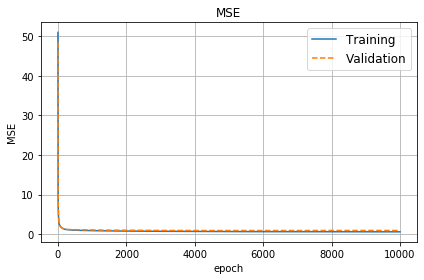

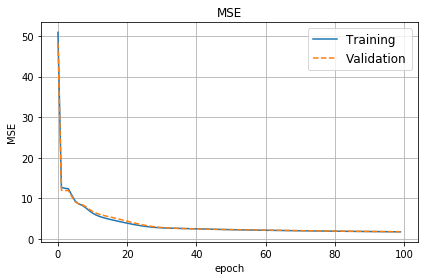

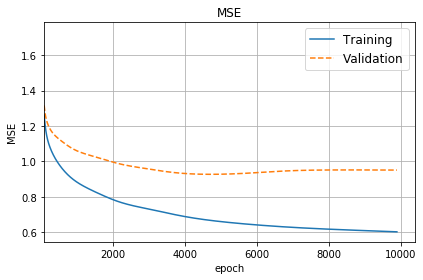

In [70]:
param = {
            "n_layer_units": [50], # con questo si specifica la topologia da provare
            "learning_rate": 0.06,
            "momentum": 0.9,
            "nesterov": True,
            "kernel_regularizer": 0.00035,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.09, 200, verbose = 1),
            "max_epoch": 10000
}

model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 1, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


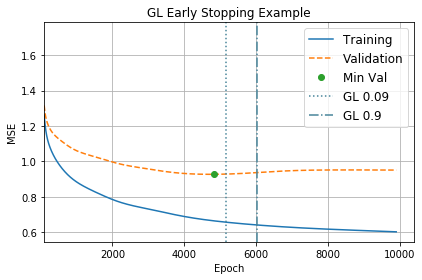

In [112]:
c = '#468499'
plt.plot(model.get_history()["loss_mse"][100:])
plt.plot(model.get_history()["val_loss_mse"][100:], linestyle='--')
plt.title('GL Early Stopping Example')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.grid()
plt.plot(4826, 0.9275464605703946, 'o')
plt.axvline(x=5170, linestyle=':', color=c)
plt.axvline(x=6018, linestyle='-.', color=c)
plt.legend(['Training', 'Validation', 'Min Val','GL 0.09', 'GL 0.9'], loc='upper right', fontsize='large')
plt.tight_layout()
plt.xlim(left = 100)
plt.savefig("figure_eps/early_stop.eps")
plt.show()